Consider that you are a medical student with a deep interest in technology. Some members of the medicine review team have asked you to help them to review each medicine and assign a usefulness score. you are required to build a model that can understand the description of medicines and assign a usefulness score automatically.

Data description

File :
1. train csv
2. test.csv
3. sample_submission.csv


Column description:

SL No.     Column Label       Column Description
1             medicine_no         Represents the medicine number
2             disease_type         type of disease
3             medicine_review
4             market_value
5             launch_date
6             score                     Respresents score that determines how useful the medicine can be in market


Evaluation criteria is RMSE:
Score =max(0,100-RMSE(actual_values,predicted_values))


Instructions:

To access files in the code editor

import pandas as pd

train=pd.read_csv('dataset/train.csv')

test=pd.read_csv('dataset/test.csv')

#It is mandatory to write your results (data frame) into the submission.csv. This can be performed as:

submission.to_csv('submission.csv',index=False)

https://www.kaggle.com/datasets/sindhurank/medicine-review-dataset/code

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [63]:
#access of file should be open to anyone


from google.colab import drive
drive.mount('/content/drive')



# Correct the links to direct download links


train_url = 'https://drive.google.com/uc?export=download&id=1QK54_j_mC6Dm239lHM4hYQmxrkBheW1E'
test_url = 'https://drive.google.com/uc?export=download&id=1N5sS9r50RUOSSd2cIhTy24kS1NdGPkhb'

# Read the CSV files from Google Drive
train = pd.read_csv(train_url)
test = pd.read_csv(test_url)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [64]:
print(train.head(2))

  medicine_no  disease_type  \
0    MD-22117           677   
1    MD-22118           121   

                                     medicine_review  market_value  \
0  I read so many horrible reviews of this that I...            10   
1  When I took the pill, I had a hard time rememb...             8   

  launch_date  score  
0   19-Mar-16     19  
1   28-Oct-13     21  


In [65]:
print(test.head(2))

  medicine_no  disease_type  \
0    MD-49997           555   
1    MD-49998           472   

                                     medicine_review  market_value launch_date  
0  I came back from Cuba with a sinus infection a...            10   23-Jan-14  
1  I just had my first injection both knees a few...            10   17-Jun-16  


In [66]:
# show columns
train.columns

Index(['medicine_no', 'disease_type', 'medicine_review', 'market_value',
       'launch_date', 'score'],
      dtype='object')

In [67]:
test.columns

Index(['medicine_no', 'disease_type', 'medicine_review', 'market_value',
       'launch_date'],
      dtype='object')

In [68]:
columns_list = test.columns.tolist()
print(columns_list)

['medicine_no', 'disease_type', 'medicine_review', 'market_value', 'launch_date']


In [69]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9852 entries, 0 to 9851
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   medicine_no      9852 non-null   object
 1   disease_type     9852 non-null   int64 
 2   medicine_review  9852 non-null   object
 3   market_value     9852 non-null   int64 
 4   launch_date      9852 non-null   object
 5   score            9852 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 461.9+ KB


In [70]:
train['medicine_review']

0       I read so many horrible reviews of this that I...
1       When I took the pill, I had a hard time rememb...
2       This is the only antidepressant that was  bene...
3       I took Alli for 2 months when it first came ou...
4       About ten days or two weeks after starting Est...
                              ...                        
9847    I&#039;ve only been using Brintellix for 1 wee...
9848    Awesome results.  I rarely have cold sores.  R...
9849    I had a serious problems with GERD. Chest pain...
9850    I had many symptoms at first, especially imbal...
9851    I didn&#039;t like my lips looking like sandpa...
Name: medicine_review, Length: 9852, dtype: object

In [71]:
# Print the value of the first row of the 'medicine_review' column
train.loc[0, 'medicine_review']

'I read so many horrible reviews of this that I almost didn&#039;t try it. Fearing the excruciating pain described by such a majority of reviews, I tried natural remedies. I even tried the &quot;put a clove of garlic up your hooha&quot; method! None of the remedies worked.\n\nThis medication was a godsend. Please do not fear it. I experienced no pain with this, and it killed the infection dead within a day or two. I was amazed. Many people write about burning pain worse than childbirth, but I want to tell you that I experienced nothing like that. It was easy, painless, and, most importantly, extremely effective. Yeast infection is finallyour gone!'

In [72]:
# Print the value of the second row of the 'medicine_review' column
train.loc[1, 'medicine_review']

'When I took the pill, I had a hard time remembering to take it everyday at the same time. With Paragard I don&#039;t even have to worry about it. I also love that it is good for 10 years and it is hormone free. It was uncomfortable to have it inserted but that only lasts for a second. I do get cramps before, during, and after my period but I know that is not the case for everybody. For me, the peace of mind is worth the trade off for the cramps. Overall I would recommend this to anyone who has already had a child and needs a reliable form of birth control.'

In [73]:
train.iloc[1]['medicine_review']

'When I took the pill, I had a hard time remembering to take it everyday at the same time. With Paragard I don&#039;t even have to worry about it. I also love that it is good for 10 years and it is hormone free. It was uncomfortable to have it inserted but that only lasts for a second. I do get cramps before, during, and after my period but I know that is not the case for everybody. For me, the peace of mind is worth the trade off for the cramps. Overall I would recommend this to anyone who has already had a child and needs a reliable form of birth control.'

In [74]:
train.shape

(9852, 6)

In [75]:
test.shape

(3284, 5)

In [76]:
train['market_value'].nunique()

10

In [100]:
train['medicine_no'].nunique()

9852

In [77]:
train['market_value'].value_counts()

market_value
10    3081
9     1716
1     1305
8     1185
7      584
5      506
2      408
3      395
6      364
4      308
Name: count, dtype: int64

In [89]:
train['score'].value_counts()

score
3      412
2      403
4      378
0      372
1      343
      ... 
222      1
332      1
470      1
216      1
198      1
Name: count, Length: 224, dtype: int64

the distribution of the score values, it seems that the score column contains discrete values ranging from 0 to at least 470. If you are treating this as a regression problem (predicting a continuous or discrete value), scaling might help

In [78]:
# Removing stop words

import nltk
import re
nltk.download('stopwords')
nltk.download('punkt')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Load the list of stop words
stop_words = set(stopwords.words('english'))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


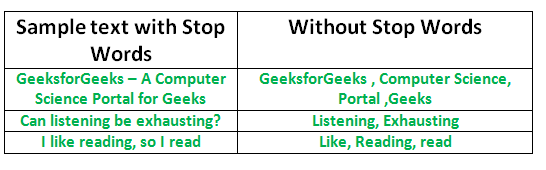

In [79]:
# Function to remove special characters, numbers, and stop words
def clean_text(text):
    # Remove special characters and numbers
    text = re.sub(r'[^A-Za-z\s]', '', text)
    # Tokenize the text
    word_tokens = word_tokenize(text)
    # Remove stop words
    filtered_text = [word for word in word_tokens if word.lower() not in stop_words]
    return ' '.join(filtered_text)

# Apply the function to the 'medicine_review' column
train['cleaned_review'] = train['medicine_review'].apply(clean_text)




Apply same clean_text function to Test Dataframe

In [105]:
test['cleaned_review'] = test['medicine_review'].apply(clean_text)

In [80]:
# Display the DataFrame to check the results


train.loc[0, 'cleaned_review']

'read many horrible reviews almost didnt try Fearing excruciating pain described majority reviews tried natural remedies even tried quotput clove garlic hoohaquot method None remedies worked medication godsend Please fear experienced pain killed infection dead within day two amazed Many people write burning pain worse childbirth want tell experienced nothing like easy painless importantly extremely effective Yeast infection finallyour gone'

In [81]:
# Before cleaning

train.loc[0, 'medicine_review']

'I read so many horrible reviews of this that I almost didn&#039;t try it. Fearing the excruciating pain described by such a majority of reviews, I tried natural remedies. I even tried the &quot;put a clove of garlic up your hooha&quot; method! None of the remedies worked.\n\nThis medication was a godsend. Please do not fear it. I experienced no pain with this, and it killed the infection dead within a day or two. I was amazed. Many people write about burning pain worse than childbirth, but I want to tell you that I experienced nothing like that. It was easy, painless, and, most importantly, extremely effective. Yeast infection is finallyour gone!'

In [82]:
# Replace the 'medicine_review' column with the 'cleaned_review' column
train['medicine_review'] = train['cleaned_review']

# Drop the 'cleaned_review' column as it's no longer needed
train = train.drop(columns=['cleaned_review'])

# Display the DataFrame to check the results
print(train.head())

  medicine_no  disease_type  \
0    MD-22117           677   
1    MD-22118           121   
2    MD-22119           200   
3    MD-22120           455   
4    MD-22121           404   

                                     medicine_review  market_value  \
0  read many horrible reviews almost didnt try Fe...            10   
1  took pill hard time remembering take everyday ...             8   
2  antidepressant beneficial Following steroid in...             9   
3  took Alli months first came last year didnt ex...             7   
4  ten days two weeks starting Estratest HS felt ...            10   

  launch_date  score  
0   19-Mar-16     19  
1   28-Oct-13     21  
2   01-Jun-17     34  
3   13-May-08     98  
4   13-Dec-09     43  


Next we will vectorize the text column medicine_review for Feature Extraction: Text data is unstructured and must be converted into structured data to extract meaningful features. Vectorization helps in capturing the importance, frequency, and relationship of words in the text.


In [83]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF Vectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the 'medicine_review' column
tfidf_matrix = vectorizer.fit_transform(train['medicine_review'])

# Convert the TF-IDF matrix to a DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())

# Concatenate the TF-IDF features with the original DataFrame
df_tfidf = pd.concat([train.reset_index(drop=True), tfidf_df.reset_index(drop=True)], axis=1)

# Optionally drop the original 'medicine_review' column if no longer needed
df_tfidf = df_tfidf.drop(columns=['medicine_review'])

# Display the first few rows of the updated DataFrame
print(df_tfidf.head())


  medicine_no  disease_type  market_value launch_date  score   aa  aampd  \
0    MD-22117           677            10   19-Mar-16     19  0.0    0.0   
1    MD-22118           121             8   28-Oct-13     21  0.0    0.0   
2    MD-22119           200             9   01-Jun-17     34  0.0    0.0   
3    MD-22120           455             7   13-May-08     98  0.0    0.0   
4    MD-22121           404            10   13-Dec-09     43  0.0    0.0   

   abacavir  abalation  abate  ...  zulane  zumba  zyban  zyclara  zydus  \
0       0.0        0.0    0.0  ...     0.0    0.0    0.0      0.0    0.0   
1       0.0        0.0    0.0  ...     0.0    0.0    0.0      0.0    0.0   
2       0.0        0.0    0.0  ...     0.0    0.0    0.0      0.0    0.0   
3       0.0        0.0    0.0  ...     0.0    0.0    0.0      0.0    0.0   
4       0.0        0.0    0.0  ...     0.0    0.0    0.0      0.0    0.0   

   zymar  zyprexa  zyrtec  zytiga  zzzquil  
0    0.0      0.0     0.0     0.0      0.

In [87]:
tfidf_matrix.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [88]:
tfidf_matrix.shape

(9852, 18529)

In [90]:
X = tfidf_matrix

Scaling target feature score

In [91]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the Min-Max Scaler
scaler = MinMaxScaler()

# Fit and transform the 'score' column
train['score'] = scaler.fit_transform(train[['score']])

# Display the first few rows of the updated DataFrame
print(train.head())


  medicine_no  disease_type  \
0    MD-22117           677   
1    MD-22118           121   
2    MD-22119           200   
3    MD-22120           455   
4    MD-22121           404   

                                     medicine_review  market_value  \
0  read many horrible reviews almost didnt try Fe...            10   
1  took pill hard time remembering take everyday ...             8   
2  antidepressant beneficial Following steroid in...             9   
3  took Alli months first came last year didnt ex...             7   
4  ten days two weeks starting Estratest HS felt ...            10   

  launch_date     score  
0   19-Mar-16  0.039916  
1   28-Oct-13  0.044118  
2   01-Jun-17  0.071429  
3   13-May-08  0.205882  
4   13-Dec-09  0.090336  


In [93]:
y = train['score']
y.head()

0    0.039916
1    0.044118
2    0.071429
3    0.205882
4    0.090336
Name: score, dtype: float64

In [94]:
#Test Train split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Linear Regression

In [96]:
# Initialize and train the Linear Regression model

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

In [98]:
# Calculate RMSE
from sklearn.metrics import mean_squared_error


rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Calculate the score
score = max(0, 100 - rmse)

print(f"RMSE: {rmse}")
print(f"Score: {score}")

RMSE: 0.19034233185554292
Score: 99.80965766814445


### Random Forest

In [99]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the Random Forest model
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)

# Make predictions
y_pred_rf = model_rf.predict(X_test)




In [101]:
# Calculate RMSE
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

# Calculate the score
score_rf = max(0, 100 - rmse_rf)

print(f"RMSE (Random Forest): {rmse_rf}")
print(f"Score (Random Forest): {score_rf}")

RMSE (Random Forest): 0.06704960240822735
Score (Random Forest): 99.93295039759177


Given the RMSE values:

- Linear Regression RMSE: 0.19034233185554292
- Random Forest RMSE: 0.06704960240822735

To determine which model is better based on RMSE:

- Lower RMSE: A lower RMSE indicates that the model's predictions are closer to the actual values, which generally means better performance.

Random Forest performed better


In [103]:
## I have scaled Y -target score using min max scaler. We will have to perform inverse transform to unscale the Y predictions
y_pred_original = scaler.inverse_transform(y_pred_rf.reshape(-1,1))
y_pred_original

array([[35.08],
       [21.8 ],
       [13.55],
       ...,
       [20.03],
       [ 5.99],
       [13.65]])

Preprocess the Test Data:
Assuming you have already cleaned the medicine_review in the training data, you should apply the same preprocessing steps to the test DataFrame. Then, vectorize the medicine_review column using the TF-IDF vectorizer.

In [106]:
test['cleaned_review'] = test['medicine_review'].apply(clean_text)
test_tfidf_matrix = vectorizer.transform(test['cleaned_review'])


In [108]:

# Transform the test data
X_test = vectorizer.transform(test['cleaned_review'])


In [109]:
# Make predictions on the test data
test_predictions = model_rf.predict(X_test)

# Create the submission DataFrame
submission_df = pd.DataFrame({
    'medicine_no': test['medicine_no'],
    'score': test_predictions
})

In [110]:
submission_df.head()

,medicine_no,score
0,MD-49997,0.060105
1,MD-49998,0.044412
2,MD-49999,0.076723
3,MD-50000,0.050462
4,MD-50001,0.078172


In [111]:

# Inverse transform to get the original scale of predictions
descaled_predictions = scaler.inverse_transform(test_predictions.reshape(-1, 1)).flatten()


In [112]:
# Create the submission DataFrame
submission_df = pd.DataFrame({
    'medicine_no': test['medicine_no'],
    'score': descaled_predictions
})
submission_df.head()

,medicine_no,score
0,MD-49997,28.61
1,MD-49998,21.14
2,MD-49999,36.52
3,MD-50000,24.02
4,MD-50001,37.21
